In [1]:
# Se da acceso al drive desde Colab
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# Se importan las dependencias y librerías necesarias
import datetime, os
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
import matplotlib.pyplot as plt

In [24]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

#Ruta del archivo CSV
nombre_archivo = '/content/gdrive/MyDrive/Universidad/Procesamiento Datos Secuenciales/proyecto_1/datasetIOT.csv'

# Se lee el archivo CSV con la columna combinada
datos = pd.read_csv(nombre_archivo)
print(datos.columns)

# Se divide la columna combinada en varias columnas
datos[['id', 'id_nodo', 'temperatura', 'humedad', 'fecha']] = datos['id\tidnodo\ttemperatura\thumedad\tfecha'].str.split('\t', expand=True)

# Se elimina la columna combinada
datos = datos.drop(columns=['id\tidnodo\ttemperatura\thumedad\tfecha'])

# Guarda el nuevo DataFrame en un nuevo archivo CSV
datos.to_csv('archivo_procesado.csv', index=False)

#como hay un solo valor nulo, se procede a eliminar manualmente la fila
indice_a_eliminar = 180

# Se elimina la fila con el índice especificado
datos = datos.drop(indice_a_eliminar)

# Reinicio de los índices después de la eliminación
datos = datos.reset_index(drop=True)

# DataFrame completo
print(datos)

Index(['id\tidnodo\ttemperatura\thumedad\tfecha'], dtype='object')
      id id_nodo temperatura humedad                fecha
0      1       1        24.1      59  2023-10-29 23:12:09
1      2       1        24.1      59  2023-10-29 23:12:14
2      3       1        24.2      59  2023-10-29 23:12:20
3      4       1        24.2      59  2023-10-29 23:12:25
4      5       1        24.2      59  2023-10-29 23:12:30
5      6       1        24.3      59  2023-10-29 23:12:36
6      7       2        25.8      62  2023-11-11 18:04:04
7      8       2        26.2      61  2023-11-11 18:04:23
8      9       2        26.2      61  2023-11-11 18:04:29
9     10       2        26.2      61  2023-11-11 18:04:35
10    11       2        26.2      63  2023-11-11 20:02:46
11    12       2        26.2      62  2023-11-11 20:03:46
12    13       2        26.2      62  2023-11-11 20:03:51
13    14       2        26.2      62  2023-11-11 20:03:56
14    15       2        26.2      62  2023-11-11 20:04:07
15   

In [80]:
# Se toman las columnas a procesar del dataset (temperatura, humedad y fecha)
columnas_procesar = datos[['temperatura', 'humedad', 'fecha']]

# Se imprimen las primeras filas del DataFrame resultante
print(columnas_procesar.head())

# Se crean dataframes para fecha y otro para temperatura y humedad juntas, se convierten los datos de cada dataframe en numericos
TempHum = datos[['temperatura', 'humedad']]
TempHum['humedad'] = pd.to_numeric(TempHum['humedad'], errors='coerce')
TempHum['temperatura'] = pd.to_numeric(TempHum['temperatura'], errors='coerce')
print(TempHum)

Fecha = datos[['fecha']].values
print(Fecha)



  temperatura humedad               fecha
0        24.1      59 2023-10-29 23:12:09
1        24.1      59 2023-10-29 23:12:14
2        24.2      59 2023-10-29 23:12:20
3        24.2      59 2023-10-29 23:12:25
4        24.2      59 2023-10-29 23:12:30
     temperatura  humedad
0           24.1       59
1           24.1       59
2           24.2       59
3           24.2       59
4           24.2       59
5           24.3       59
6           25.8       62
7           26.2       61
8           26.2       61
9           26.2       61
10          26.2       63
11          26.2       62
12          26.2       62
13          26.2       62
14          26.2       62
15          26.2       61
16          26.2       61
17          26.2       61
18          26.2       61
19          25.8       61
20          25.8       61
21          25.8       61
22          25.8       61
23          25.8       61
24          25.8       61
25          25.8       61
26          25.8       61
27          25.8    

<ipython-input-80-a35c0d7934e1>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TempHum['humedad'] = pd.to_numeric(TempHum['humedad'], errors='coerce')
<ipython-input-80-a35c0d7934e1>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TempHum['temperatura'] = pd.to_numeric(TempHum['temperatura'], errors='coerce')


[['2023-10-29T23:12:09.000000000']
 ['2023-10-29T23:12:14.000000000']
 ['2023-10-29T23:12:20.000000000']
 ['2023-10-29T23:12:25.000000000']
 ['2023-10-29T23:12:30.000000000']
 ['2023-10-29T23:12:36.000000000']
 ['2023-11-11T18:04:04.000000000']
 ['2023-11-11T18:04:23.000000000']
 ['2023-11-11T18:04:29.000000000']
 ['2023-11-11T18:04:35.000000000']
 ['2023-11-11T20:02:46.000000000']
 ['2023-11-11T20:03:46.000000000']
 ['2023-11-11T20:03:51.000000000']
 ['2023-11-11T20:03:56.000000000']
 ['2023-11-11T20:04:07.000000000']
 ['2023-11-11T20:04:12.000000000']
 ['2023-11-11T20:04:17.000000000']
 ['2023-11-11T20:04:23.000000000']
 ['2023-11-11T20:04:29.000000000']
 ['2023-12-03T22:01:42.000000000']
 ['2023-12-03T22:01:49.000000000']
 ['2023-12-03T22:02:21.000000000']
 ['2023-12-03T22:02:52.000000000']
 ['2023-12-03T22:03:22.000000000']
 ['2023-12-03T22:03:52.000000000']
 ['2023-12-03T22:04:22.000000000']
 ['2023-12-03T22:04:52.000000000']
 ['2023-12-03T22:05:23.000000000']
 ['2023-12-03T22:05:

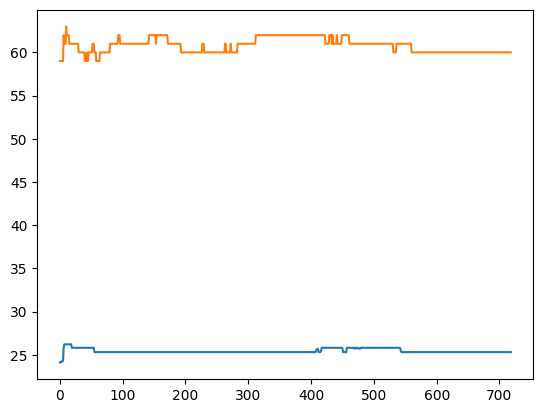

In [81]:
# Se grafican los datos de la temperatura
plt.plot(TempHum)


In [84]:
# Se normalizan los datos (media = 0 y desv esta = 1)
scaler1 = StandardScaler()
scaler1.fit(TempHum)
TempHumN=scaler1.transform(TempHum)

(719, 2)


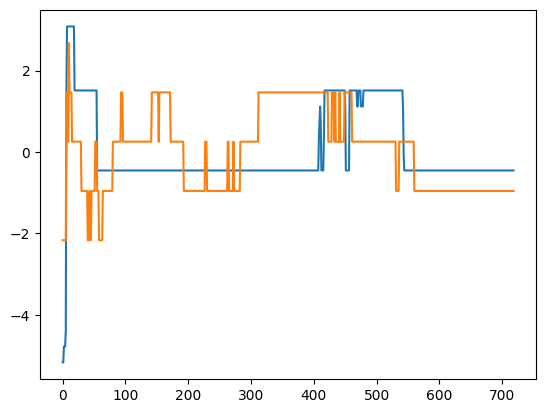

In [85]:
# Se grafican los datos normalizados
plt.plot(TempHumN)
print(TempHumN.shape)

In [86]:
print(TempHumN)

[[-5.17205235 -2.16840548]
 [-5.17205235 -2.16840548]
 [-4.77899605 -2.16840548]
 ...
 [-0.45537677 -0.95793689]
 [-0.45537677 -0.95793689]
 [-0.45537677 -0.95793689]]


In [152]:
  #Se dividen los datos para el entrenamiento
  InfTrain=TempHumN[0:500]
  Dataset = keras.utils.timeseries_dataset_from_array(
  data=InfTrain[:-10],
  targets=InfTrain[10:],
  sequence_length=10,
  sequence_stride=1,
  sampling_rate=1,
  batch_size=1,
  )

In [162]:
#Se crea el enventanado para los datos de entrenamiento con una longitud de 10 palabras y 2 dimensiones.
CantidadWindows=481
LongitudWindow=10

DatosVentanasInput=np.zeros((CantidadWindows,LongitudWindow,2))
DatosVentanasOutput=np.zeros((CantidadWindows,2))

Cont=0
for inputs in Dataset:
      DatoAux=np.array(inputs[0][:])
      DatoAux2=DatoAux.reshape(2,10)
      DatosVentanasInput[Cont,:]=DatoAux2.T
      Cont=Cont+1

Cont=0
for targets in Dataset:
      DatoAux3=np.array(targets[1][:])
      DatosVentanasOutput[Cont]=DatoAux3
      Cont=Cont+1

In [163]:
# Se crea las variables para la entrada y la salida de entrenamiento del modelo autoregresivo
# Esto depende del tamaño de la ventana de datos que se use como entrada al modelo (en este caso al ser un modelo autoregresivo multivariable es de 2 dimensiones)
Xtrain=np.zeros((CantidadWindows,LongitudWindow,2))
Ytrain=np.zeros((CantidadWindows,2))
for i in range(CantidadWindows):
    Xtrain[i,:]=DatosVentanasInput[i,:,:].reshape(10,2)
    Ytrain[i]=DatosVentanasOutput[i]

print(Xtrain)
print(Ytrain)

[[[-5.17205235 -4.38593975]
  [-2.16840548 -2.16840548]
  [-5.17205235  1.50990472]
  ...
  [-2.16840548  0.25253169]
  [-4.77899605  3.08212992]
  [-2.16840548  0.25253169]]

 [[-5.17205235  1.50990472]
  [-2.16840548  1.46300028]
  [-4.77899605  3.08212992]
  ...
  [-2.16840548  0.25253169]
  [-4.38593975  3.08212992]
  [-2.16840548  2.67346887]]

 [[-4.77899605  3.08212992]
  [-2.16840548  0.25253169]
  [-4.77899605  3.08212992]
  ...
  [-2.16840548  2.67346887]
  [ 1.50990472  3.08212992]
  [ 1.46300028  1.46300028]]

 ...

 [[ 1.11684843  1.50990472]
  [ 0.25253169  0.25253169]
  [ 1.50990472  1.50990472]
  ...
  [ 0.25253169  0.25253169]
  [ 1.50990472  1.50990472]
  [ 0.25253169  0.25253169]]

 [[ 1.50990472  1.50990472]
  [ 0.25253169  0.25253169]
  [ 1.50990472  1.50990472]
  ...
  [ 0.25253169  0.25253169]
  [ 1.50990472  1.50990472]
  [ 0.25253169  0.25253169]]

 [[ 1.50990472  1.50990472]
  [ 0.25253169  0.25253169]
  [ 1.50990472  1.50990472]
  ...
  [ 0.25253169  0.252531

In [164]:
  #Se dividen los datos para el testeo
  InfTest=TempHumN[500:-1]
  DatasetTest = keras.utils.timeseries_dataset_from_array(
  data=InfTest[:-10],
  targets=InfTest[10:],
  sequence_length=10,
  sequence_stride=1,
  sampling_rate=1,
  batch_size=1,
  )

In [167]:
#Se crea el enventanado para los datos de testeo con una longitud de 10 palabras y dimension 2.
CantidadWindowsTest=199
LongitudWindow=10
#Datos=np.zeros((cantidadFiles*600,3))

DatosVentanasInputTest=np.zeros((CantidadWindowsTest,LongitudWindow,2))
DatosVentanasOutputTest=np.zeros((CantidadWindowsTest,2))

Cont=0
for inputs in DatasetTest:
      DatoAux=np.array(inputs[0][:])
      DatoAux2=DatoAux.reshape(2,10)
      DatosVentanasInputTest[Cont,:]=DatoAux2.T
      Cont=Cont+1

Cont=0
for targets in DatasetTest:
      DatoAux3=np.array(targets[1][:])
      DatosVentanasOutputTest[Cont]=DatoAux3
      Cont=Cont+1

In [168]:
# Se crea las variables para la entrada y la salida de testeo del modelo autoregresivo
# Esto depende del tamaño de la ventana de datos que se use como entrada al modelo (en este caso al ser un modelo autoregresivo multivariable es de 2 dimensiones)
Xtest=np.zeros((CantidadWindowsTest,LongitudWindow,2))
Ytest=np.zeros((CantidadWindowsTest,2))
for i in range(CantidadWindowsTest):
    Xtest[i,:]=DatosVentanasInputTest[i,:,:].reshape(10,2)
    Ytest[i]=DatosVentanasOutputTest[i]


print(Xtest)
print(Ytest)

[[[ 1.50990472  1.50990472]
  [ 0.25253169  0.25253169]
  [ 1.50990472  1.50990472]
  ...
  [ 0.25253169  0.25253169]
  [ 1.50990472  1.50990472]
  [ 0.25253169  0.25253169]]

 [[ 1.50990472  1.50990472]
  [ 0.25253169  0.25253169]
  [ 1.50990472  1.50990472]
  ...
  [ 0.25253169  0.25253169]
  [ 1.50990472  1.50990472]
  [ 0.25253169  0.25253169]]

 [[ 1.50990472  1.50990472]
  [ 0.25253169  0.25253169]
  [ 1.50990472  1.50990472]
  ...
  [ 0.25253169  0.25253169]
  [ 1.50990472  1.50990472]
  [ 0.25253169  0.25253169]]

 ...

 [[-0.45537677 -0.45537677]
  [-0.95793689 -0.95793689]
  [-0.45537677 -0.45537677]
  ...
  [-0.95793689 -0.95793689]
  [-0.45537677 -0.45537677]
  [-0.95793689 -0.95793689]]

 [[-0.45537677 -0.45537677]
  [-0.95793689 -0.95793689]
  [-0.45537677 -0.45537677]
  ...
  [-0.95793689 -0.95793689]
  [-0.45537677 -0.45537677]
  [-0.95793689 -0.95793689]]

 [[-0.45537677 -0.45537677]
  [-0.95793689 -0.95793689]
  [-0.45537677 -0.45537677]
  ...
  [-0.95793689 -0.957936

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 8, 32)             224       
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 4, 32)             0         
 g1D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
 dense_3 (Dense)             (None, 2)                 22        
                                                                 
Total params: 1536 (6.00 KB)
Trainable params: 1536 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
______________________

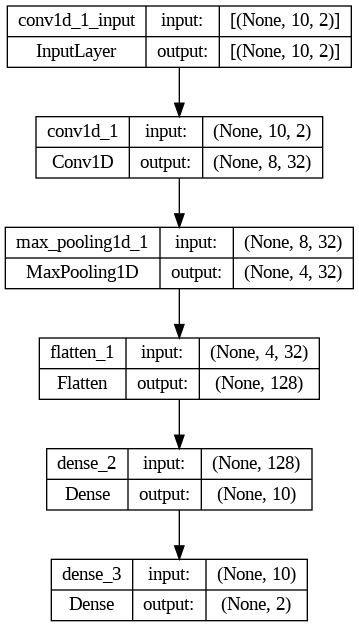

In [133]:
# Se crea el modelo secuencial en Keras con capas densas
modelo = keras.models.Sequential()

# Agregar una capa de convolución 1D con 32 filtros y tamaño del kernel 3
modelo.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(10, 2)))

# Agregar una capa de pooling (agrupación) para reducir la dimensionalidad
modelo.add(MaxPooling1D(pool_size=2))

# Agregar una capa de aplanamiento (flatten) para convertir los datos en un vector unidimensional
modelo.add(Flatten())

#modelo.add(keras.layers.Dense(5,input_shape=(10,),activation='relu'))
modelo.add(keras.layers.Dense(10,activation='relu'))
modelo.add(keras.layers.Dense(2,activation='linear'))
# Se muestra el resumen de la arquitectura del modelo
modelo.summary()
# Se muestra un esquema del modelo
keras.utils.plot_model(modelo, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [169]:
from keras.models import load_model

# Supongamos que tu modelo se llama 'modelo' y ya está entrenado
# Guardar el modelo en formato h5
modelo.save('sequential_1.h5')

# Descargar el modelo a tu máquina local
from google.colab import files
files.download('sequential_1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [134]:
# Se compila el modelo
modelo.compile('adam','mse',metrics=['mse'])
# Se entrena el modelo
historia=modelo.fit(Xtrain,Ytrain,validation_data=(Xtest,Ytest),epochs=250,verbose=1)

Epoch 1/250
16/16 [==============================] - 1s 22ms/step - loss: 0.8406 - mse: 0.8406 - val_loss: 0.5199 - val_mse: 0.5199
Epoch 2/250
16/16 [==============================] - 0s 10ms/step - loss: 0.6955 - mse: 0.6955 - val_loss: 0.2912 - val_mse: 0.2912
Epoch 3/250
16/16 [==============================] - 0s 11ms/step - loss: 0.6159 - mse: 0.6159 - val_loss: 0.1986 - val_mse: 0.1986
Epoch 4/250
16/16 [==============================] - 0s 7ms/step - loss: 0.5626 - mse: 0.5626 - val_loss: 0.1700 - val_mse: 0.1700
Epoch 5/250
16/16 [==============================] - 0s 7ms/step - loss: 0.5179 - mse: 0.5179 - val_loss: 0.1709 - val_mse: 0.1709
Epoch 6/250
16/16 [==============================] - 0s 6ms/step - loss: 0.4778 - mse: 0.4778 - val_loss: 0.1638 - val_mse: 0.1638
Epoch 7/250
16/16 [==============================] - 0s 6ms/step - loss: 0.4388 - mse: 0.4388 - val_loss: 0.1593 - val_mse: 0.1593
Epoch 8/250
16/16 [==============================] - 0s 5ms/step - loss: 0.4040 

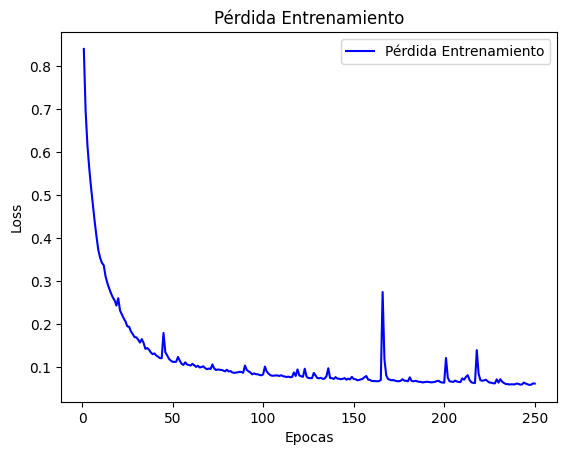

In [135]:
# Se gráfica la evolución de la pérdida durante el entrenamiento
perdida_train = historia.history['loss']
epocas = range(1, len(perdida_train) + 1)

plt.plot(epocas, perdida_train, 'b', label='Pérdida Entrenamiento')
plt.title('Pérdida Entrenamiento')
plt.xlabel('Epocas')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [136]:
# Se calcula el MSE del modelo con los datos de testeo
MSE = modelo.evaluate(Xtest, Ytest)
print("Loss:", MSE[0])

7/7 [==============================] - 0s 2ms/step - loss: 0.0677 - mse: 0.0677
Loss: 0.06769178062677383


7/7 [==============================] - 0s 2ms/step


0.06769178

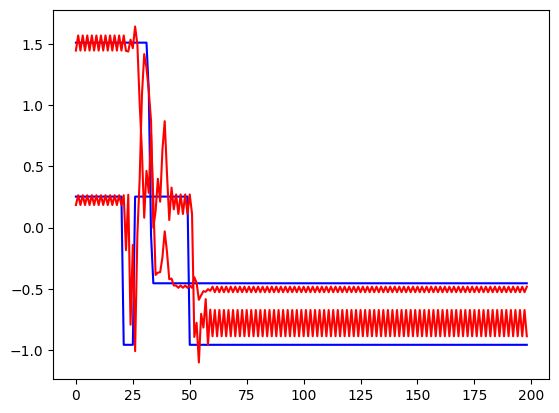

In [151]:
# Se realiza la predicción
Ypredic1=modelo.predict(Xtest)
plt.plot(Ytest,'b',Ypredic1,'r')
# Se calcula el MSE logrado con las predicciones
np.mean(keras.losses.mean_squared_error(Ytest, Ypredic1))